In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Expresso Churn Prediction Challenge

Expresso is an African telecommunications company that provides customers with airtime and mobile data bundles. The objective of this challenge is to develop a machine learning model to predict the likelihood of each Expresso customer “churning,” i.e. becoming inactive and not making any transactions for 90 days.

In [2]:
train = pd.read_csv('Train.csv')
train

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154043,ffffe85215ddc71a84f95af0afb0deeea90e6967,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,6,NaN,NaN,0
2154044,ffffeaaa9289cdba0ac000f0ab4b48f4aa74ed15,THIES,K > 24 month,6100.0,15.0,5800.0,1933.0,15.0,621.0,26.0,40.0,40.0,NaN,NaN,NO,55,"Data: 200 F=100MB,24H",9.0,0
2154045,fffff172fda1b4bb38a95385951908bb92379809,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,1
2154046,fffff5911296937a37f09a37a549da2e0dad6dbb,THIES,K > 24 month,10000.0,11.0,7120.0,2373.0,13.0,NaN,0.0,140.0,13.0,NaN,NaN,NO,28,All-net 500F=2000F;5d,12.0,0


In [3]:
test = pd.read_csv('Test.csv')
test

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,THIES,K > 24 month,5000.0,5.0,5000.0,1667.0,5.0,NaN,378.0,11.0,5.0,NaN,NaN,NO,42,On-net 1000F=10MilF;10d,5.0
1,000055d41c8a62052dd426592e8a4a3342bf565d,NaN,I 18-21 month,300.0,2.0,326.0,109.0,3.0,397.0,NaN,0.0,NaN,NaN,NaN,NO,41,"Data: 100 F=40MB,24H",1.0
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,DAKAR,K > 24 month,3300.0,25.0,3400.0,1133.0,26.0,7150.0,0.0,2.0,5.0,NaN,NaN,NO,57,"Data: 100 F=40MB,24H",22.0
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,9,NaN,NaN
4,0000bae5480628cf8fe51ad84bcb39772fc79224,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,10,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380122,fffe7e03c7eede2ad0a728ee516c4d342dd16107,DAKAR,K > 24 month,4000.0,8.0,3999.0,1333.0,8.0,1587.0,26.0,250.0,1.0,NaN,NaN,NO,53,Mixt 250F=Unlimited_call24H,5.0
380123,fffec230e6a1aa51ab37d0051ece42de611e71c6,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN
380124,ffff0dcc1ab9812bf205b6d76e9d084053cd96f5,NaN,K > 24 month,3950.0,7.0,3949.0,1316.0,10.0,1724.0,25.0,71.0,NaN,NaN,NaN,NO,15,IVR Echat_Daily_50F,6.0
380125,ffff91ea6a09a0c8ea42bc6ae33df4b5e06283dc,NaN,K > 24 month,3850.0,18.0,3955.0,1318.0,23.0,2962.0,0.0,7.0,NaN,NaN,NaN,NO,29,"Data: 100 F=40MB,24H",11.0


In [4]:
sample = pd.read_csv('SampleSubmission.csv')
sample

,user_id,CHURN
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,0
1,000055d41c8a62052dd426592e8a4a3342bf565d,0
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,0
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,0
4,0000bae5480628cf8fe51ad84bcb39772fc79224,0
...,...,...
380122,fffe7e03c7eede2ad0a728ee516c4d342dd16107,0
380123,fffec230e6a1aa51ab37d0051ece42de611e71c6,0
380124,ffff0dcc1ab9812bf205b6d76e9d084053cd96f5,0
380125,ffff91ea6a09a0c8ea42bc6ae33df4b5e06283dc,0


In [5]:
# change column names to lower 
train = train.rename(columns=str.lower)
test = test.rename(columns=str.lower)
sample = sample.rename(columns=str.lower)

In [6]:
sample.churn.value_counts()

0    380127
Name: churn, dtype: int64

As we can see from the above, in 'sample' dataset all of the values for churn is 0. If all the target values in our test dataset will be 0, that wouldn't make any sense. That is why, we need to merge all these dataframes. Merge will be done by 'user_id'.

In [7]:
df = pd.merge(test, sample, on="user_id")
df.head()

,user_id,region,tenure,montant,frequence_rech,revenue,arpu_segment,frequence,data_volume,on_net,orange,tigo,zone1,zone2,mrg,regularity,top_pack,freq_top_pack,churn
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,THIES,K > 24 month,5000.0,5.0,5000.0,1667.0,5.0,NaN,378.0,11.0,5.0,NaN,NaN,NO,42,On-net 1000F=10MilF;10d,5.0,0
1,000055d41c8a62052dd426592e8a4a3342bf565d,NaN,I 18-21 month,300.0,2.0,326.0,109.0,3.0,397.0,NaN,0.0,NaN,NaN,NaN,NO,41,"Data: 100 F=40MB,24H",1.0,0
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,DAKAR,K > 24 month,3300.0,25.0,3400.0,1133.0,26.0,7150.0,0.0,2.0,5.0,NaN,NaN,NO,57,"Data: 100 F=40MB,24H",22.0,0
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,9,NaN,NaN,0
4,0000bae5480628cf8fe51ad84bcb39772fc79224,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,10,NaN,NaN,0


In [8]:
train.head()

,user_id,region,tenure,montant,frequence_rech,revenue,arpu_segment,frequence,data_volume,on_net,orange,tigo,zone1,zone2,mrg,regularity,top_pack,freq_top_pack,churn
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0


In [9]:
# concatenate two tables
frames = [train, df]
data = pd.concat(frames)
data.head()

,user_id,region,tenure,montant,frequence_rech,revenue,arpu_segment,frequence,data_volume,on_net,orange,tigo,zone1,zone2,mrg,regularity,top_pack,freq_top_pack,churn
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0


In [10]:
data.shape

(2534175, 19)

In [11]:
data.isnull().sum()

user_id                 0
region             999027
tenure                  0
montant            889794
frequence_rech     889794
revenue            853421
arpu_segment       853421
frequence          853421
data_volume       1247473
on_net             925189
orange            1052478
tigo              1517017
zone1             2334593
zone2             2373275
mrg                     0
regularity              0
top_pack          1061373
freq_top_pack     1061373
churn                   0
dtype: int64

In [12]:
# x = data.churn.value_counts().values
# sns.barplot([0,1], x).set_title('Target variable count');
# plt.title('Target variable count')

## Checking for Imbalance

In [13]:
data.churn.value_counts()

0    2130189
1     403986
Name: churn, dtype: int64

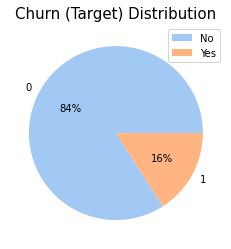

In [14]:
size = data.churn.value_counts()
labels = data.churn.value_counts().index
label=['No', 'Yes']
y = np.array(size)

colors = sns.color_palette('pastel')[0:2]
plt.pie(size, labels = labels, colors = colors, autopct='%.0f%%')
plt.legend(label)
plt.title('Churn (Target) Distribution', fontsize=15)
plt.show()

## [models](https://www.kaggle.com/code/yasserhessein/airline-passenger-eda-7-algorithms-accuracy97)<br>
## [telecom project](https://www.kaggle.com/code/semihizinli/churn-telecom-project#3-|-Basic-Data-Analysis)

## Missing values

In [15]:
# Features with missing values
missing = data.isnull().sum().sort_values(ascending = False).head(20)
miss_percent = (missing/len(data))*100

# Percentage of missing values
pd.DataFrame({'missing values number': missing, '% of missing data': miss_percent.values})

,missing values number,% of missing data
zone2,2373275,93.650794
zone1,2334593,92.124380
tigo,1517017,59.862362
data_volume,1247473,49.226001
freq_top_pack,1061373,41.882388
top_pack,1061373,41.882388
orange,1052478,41.531386
region,999027,39.422179
on_net,925189,36.508489
montant,889794,35.111782


In [16]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:>

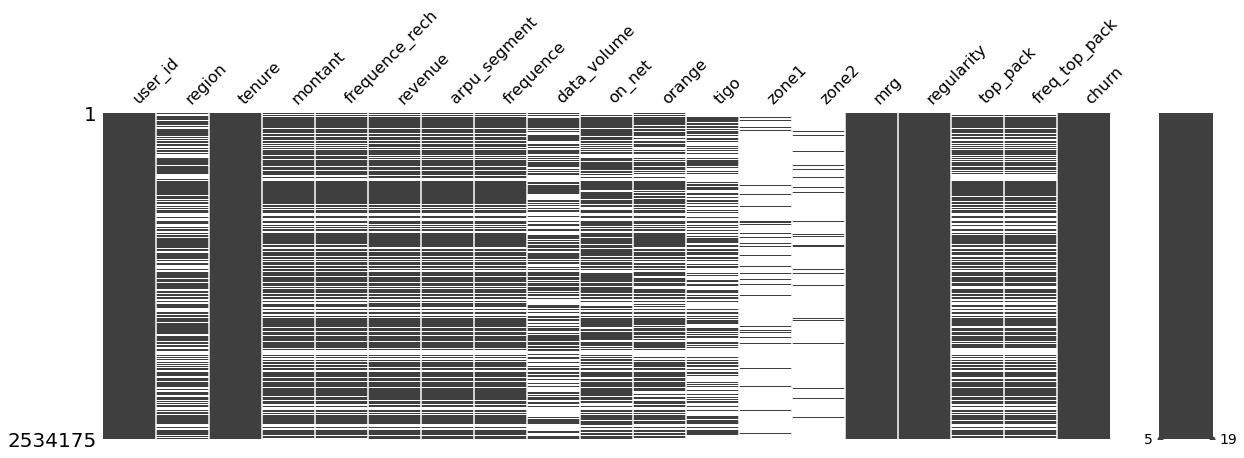

In [17]:
import missingno as mno

mno.matrix(data, figsize = (20, 6))

<AxesSubplot:>

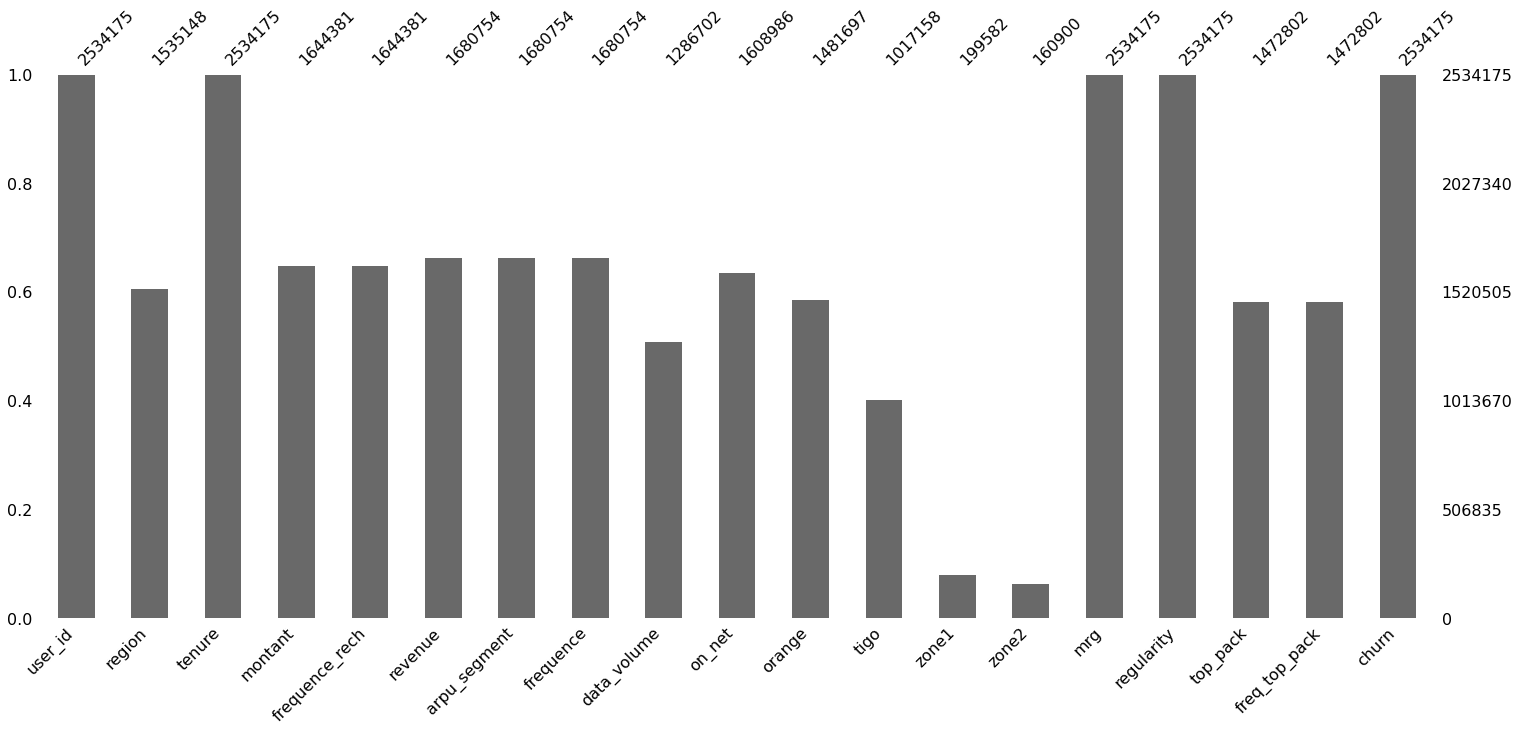

In [18]:
mno.bar(data)

<AxesSubplot:>

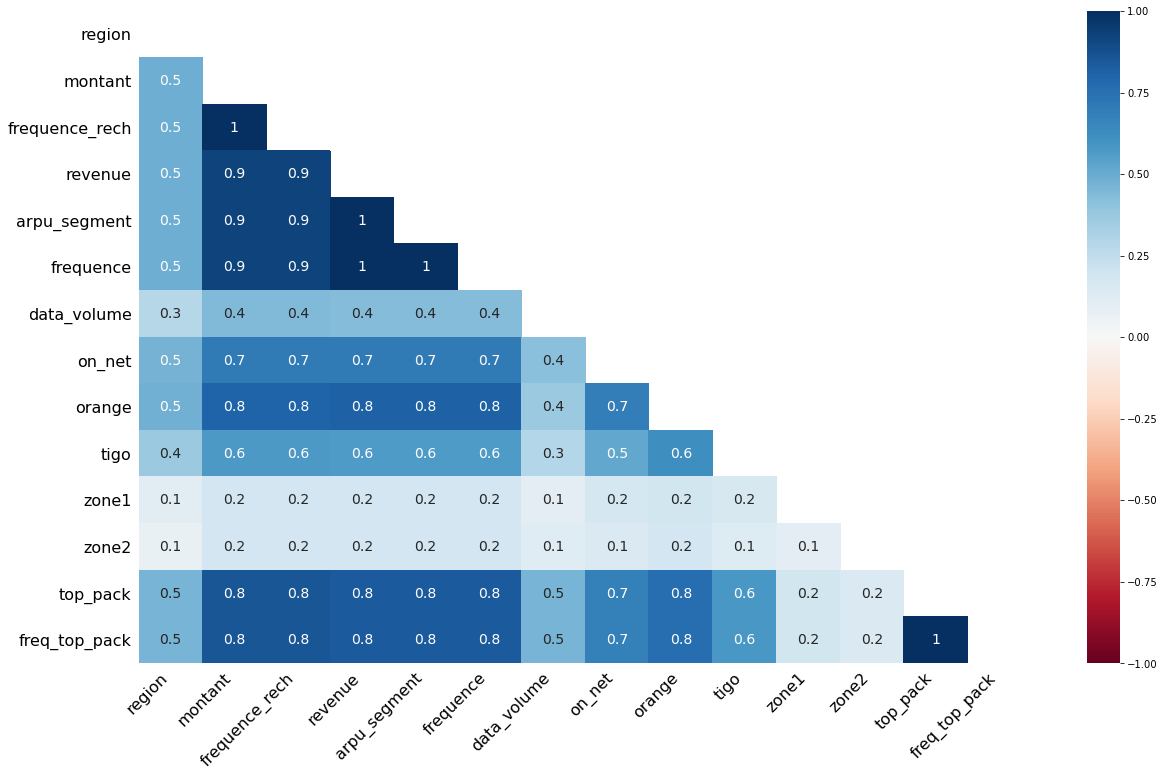

In [19]:
mno.heatmap(data)

The heatmap function shows that there are strong correlations between missing values of different features. <br>
Low correlations indicate that the data are MAR(Missing at random).

<AxesSubplot:>

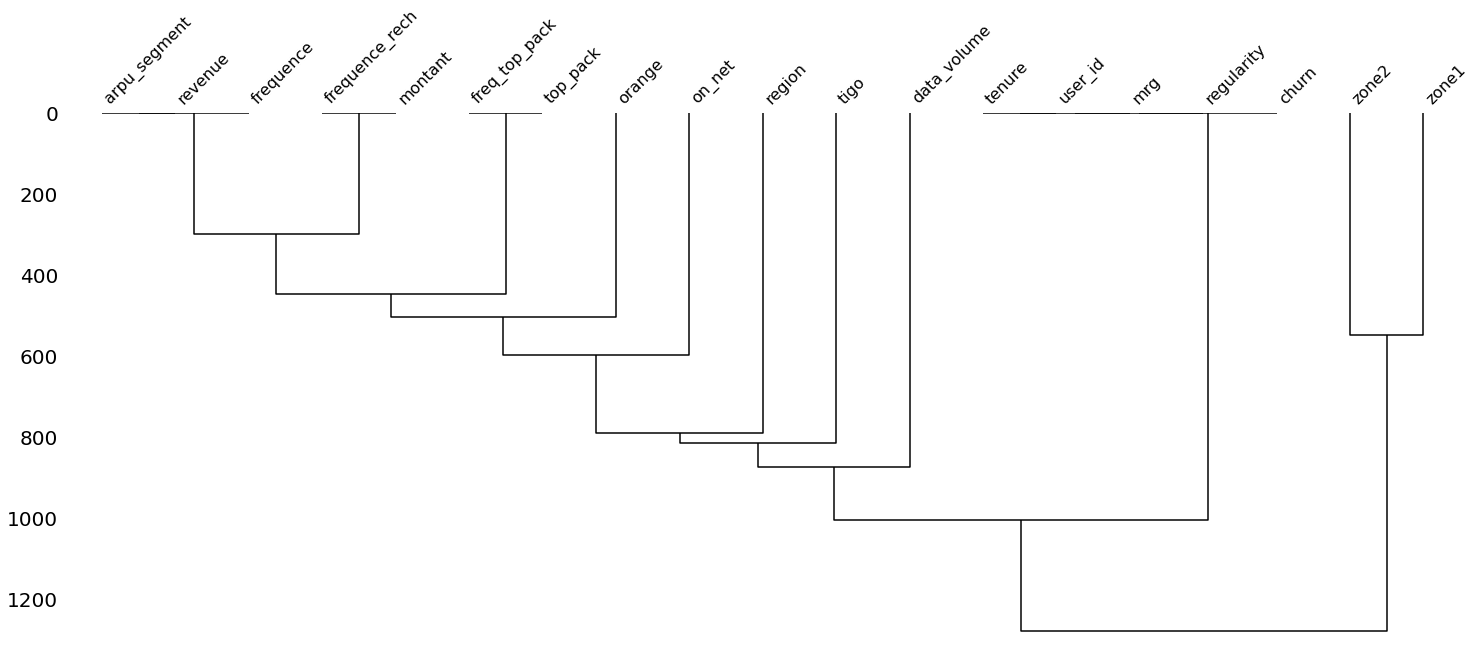

In [20]:
mno.dendrogram(data)

- Cluster leaves which linked together at a distance of zero fully predict one another's presence—one variable might always be empty when another is filled, or they might always both be filled or both empty, and so on(missingno documentation)
- The missingness of 'on_net' tends to be more similar to 'orange' than to 'region' and so on. 

In [21]:
data.dropna(subset=['arpu_segment', 'revenue', 'frequence'], how = 'all', inplace=True)

In [22]:
data.shape

(1680754, 19)

<AxesSubplot:>

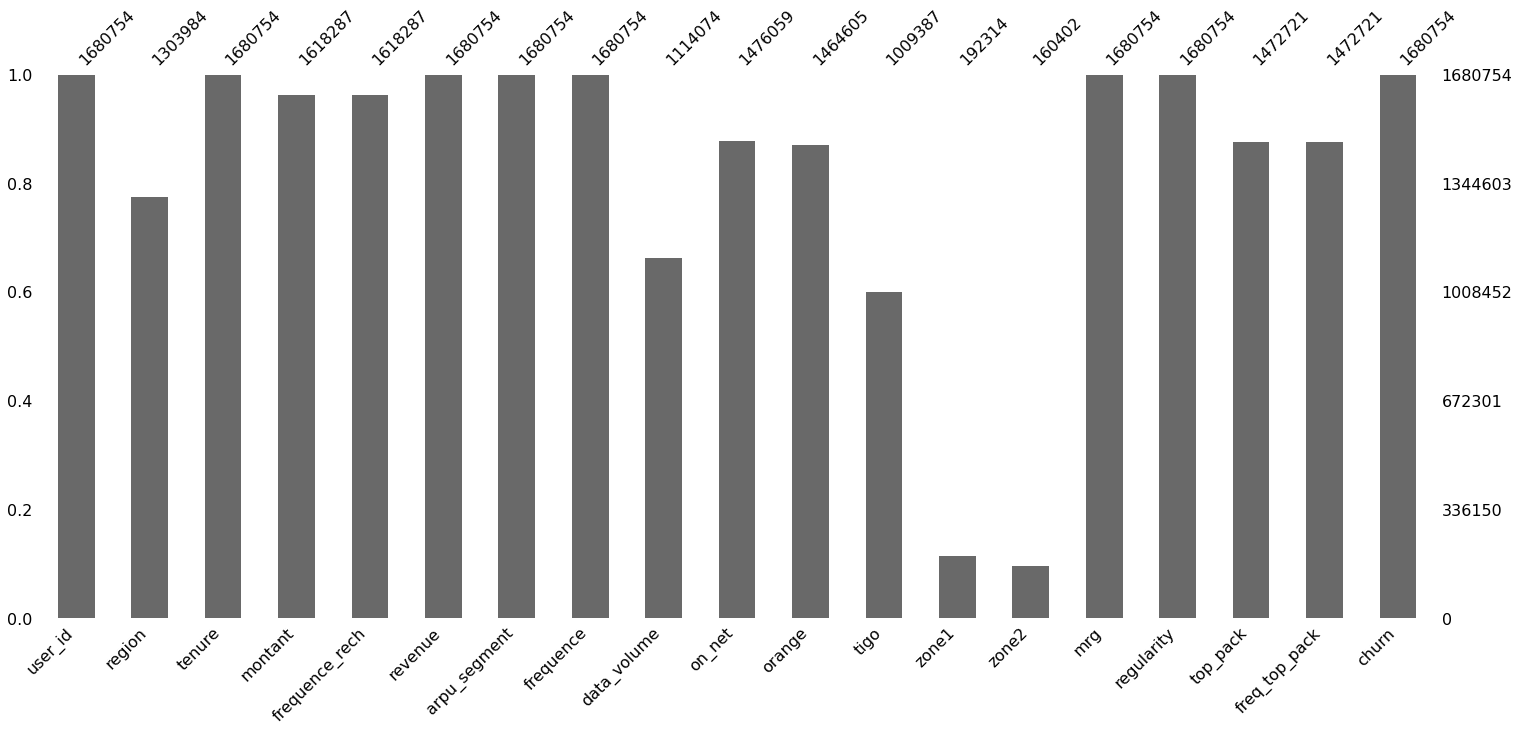

In [23]:
mno.bar(data)

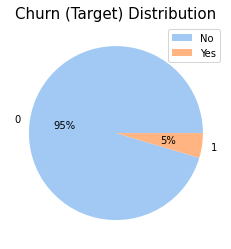

0    1603561
1      77193
Name: churn, dtype: int64


In [24]:
size = data.churn.value_counts()
labels = data.churn.value_counts().index
label=['No', 'Yes']
y = np.array(size)

colors = sns.color_palette('pastel')[0:2]
plt.pie(size, labels = labels, colors = colors, autopct='%.0f%%')
plt.legend(label)
plt.title('Churn (Target) Distribution', fontsize=15)
plt.show()

print(data.churn.value_counts())

Percentages of missing values in 'zone1' and 'zone2' columns are greater than 90%. For that reason, we can drop those columns.
Also 'user_id' column can be dropped, because it doesn't hold any crucial information.

In [25]:
data.drop(columns=['zone1', 'zone2'], axis=1, inplace=True)

## Filling Missing values

## Correlation with other columns

In [26]:
data.corr()

,montant,frequence_rech,revenue,arpu_segment,frequence,data_volume,on_net,orange,tigo,regularity,freq_top_pack,churn
montant,1.000000,0.790971,0.977077,0.977077,0.775424,0.300683,0.326491,0.658026,0.412533,0.518499,0.741025,-0.086068
frequence_rech,0.790971,1.000000,0.799879,0.799878,0.956089,0.152658,0.404968,0.518861,0.342987,0.552838,0.868894,-0.102603
revenue,0.977077,0.799879,1.000000,1.000000,0.785456,0.306957,0.331883,0.660904,0.412403,0.532010,0.750907,-0.104635
arpu_segment,0.977077,0.799878,1.000000,1.000000,0.785455,0.306957,0.331883,0.660905,0.412403,0.532008,0.750907,-0.104635
frequence,0.775424,0.956089,0.785456,0.785455,1.000000,0.169376,0.395269,0.471795,0.307009,0.591286,0.844751,-0.127918
data_volume,0.300683,0.152658,0.306957,0.306957,0.169376,1.000000,-0.023181,0.062469,0.022963,0.176390,0.118645,-0.010926
on_net,0.326491,0.404968,0.331883,0.331883,0.395269,-0.023181,1.000000,0.221391,0.137290,0.261084,0.356398,-0.042981
orange,0.658026,0.518861,0.660904,0.660905,0.471795,0.062469,0.221391,1.000000,0.405083,0.308927,0.553588,-0.057707
tigo,0.412533,0.342987,0.412403,0.412403,0.307009,0.022963,0.137290,0.405083,1.000000,0.193038,0.369002,-0.032287
regularity,0.518499,0.552838,0.532010,0.532008,0.591286,0.176390,0.261084,0.308927,0.193038,1.000000,0.446004,-0.278262


In [27]:
#revenue and arpu_segment's columns correlation is 1, that is why I can drop one of them.
data.drop(columns=['arpu_segment'], axis=1, inplace=True)

In [28]:
# Get Correlation of "churn" with other variables:
c = data.corr()['churn'].abs()
sc = c.sort_values()
a = dict(sc.tail(40))
b = a.keys()

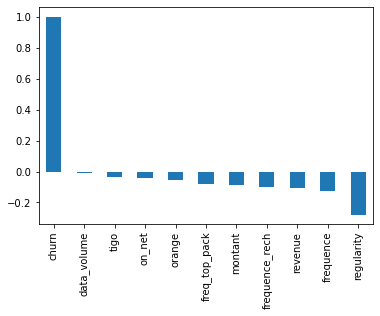

In [29]:
# fig = plt.figure(figsize=(15,8))
data[b].corr()['churn'].sort_values(ascending = False).plot(kind='bar');
# plt.show()

In [30]:
data.nunique()

user_id           1680754
region                 14
tenure                  8
montant              7223
frequence_rech        126
revenue             39742
frequence              91
data_volume         43850
on_net              10320
orange               3283
tigo                 1376
mrg                     1
regularity             62
top_pack              142
freq_top_pack         257
churn                   2
dtype: int64

We can drop 'mrg' column because there is only one unique value.

In [31]:
data.drop(columns=['mrg'], axis=1, inplace=True)

In [32]:
data.shape

(1680754, 15)

## Multivariate feature imputation

A more sophisticated [approach](https://scikit-learn.org/stable/modules/impute.html) is to use the IterativeImputer class, which models each feature with missing values as a function of other features, and uses that estimate for imputation. It does so in an iterated round-robin fashion: at each step, a feature column is designated as output y and the other feature columns are treated as inputs X. A regressor is fit on (X, y) for known y. Then, the regressor is used to predict the missing values of y. This is done for each feature in an iterative fashion, and then is repeated for max_iter imputation rounds. The results of the final imputation round are returned.

__Note__ This estimator is still experimental for now: default parameters or details of behaviour might change without any deprecation cycle. 

In [33]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
data["tenure1"] = ord_enc.fit_transform(data[["tenure"]])

In [34]:
data[["tenure1", "tenure"]].head(11)

,tenure1,tenure
0,7.0,K > 24 month
2,7.0,K > 24 month
3,7.0,K > 24 month
4,7.0,K > 24 month
5,7.0,K > 24 month
7,7.0,K > 24 month
8,7.0,K > 24 month
9,7.0,K > 24 month
11,7.0,K > 24 month
13,7.0,K > 24 month


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1680754 entries, 0 to 380125
Data columns (total 16 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   user_id         1680754 non-null  object 
 1   region          1303984 non-null  object 
 2   tenure          1680754 non-null  object 
 3   montant         1618287 non-null  float64
 4   frequence_rech  1618287 non-null  float64
 5   revenue         1680754 non-null  float64
 6   frequence       1680754 non-null  float64
 7   data_volume     1114074 non-null  float64
 8   on_net          1476059 non-null  float64
 9   orange          1464605 non-null  float64
 10  tigo            1009387 non-null  float64
 11  regularity      1680754 non-null  int64  
 12  top_pack        1472721 non-null  object 
 13  freq_top_pack   1472721 non-null  float64
 14  churn           1680754 non-null  int64  
 15  tenure1         1680754 non-null  float64
dtypes: float64(10), int64(2), object(4)
m

In [36]:
cols = ['tenure1', 'regularity', 'frequence', 'frequence_rech', 'montant']
X = data[cols]

In [37]:
X

,tenure1,regularity,frequence,frequence_rech,montant
0,7.0,54,17.0,15.0,4250.0
2,7.0,17,2.0,2.0,3600.0
3,7.0,62,18.0,15.0,13500.0
4,7.0,11,1.0,1.0,1000.0
5,7.0,62,18.0,17.0,8500.0
...,...,...,...,...,...
380120,7.0,52,7.0,7.0,3300.0
380121,7.0,50,38.0,28.0,4700.0
380122,7.0,53,8.0,8.0,4000.0
380124,7.0,15,10.0,7.0,3950.0


In [38]:
X.isnull().sum()

tenure1               0
regularity            0
frequence             0
frequence_rech    62467
montant           62467
dtype: int64

In [39]:
from sklearn.impute import SimpleImputer

In [40]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [41]:
impute_it = IterativeImputer(max_iter=10, random_state=42)
impute_it = impute_it.fit_transform(X)

In [42]:
impute_it

array([[7.00e+00, 5.40e+01, 1.70e+01, 1.50e+01, 4.25e+03],
       [7.00e+00, 1.70e+01, 2.00e+00, 2.00e+00, 3.60e+03],
       [7.00e+00, 6.20e+01, 1.80e+01, 1.50e+01, 1.35e+04],
       ...,
       [7.00e+00, 5.30e+01, 8.00e+00, 8.00e+00, 4.00e+03],
       [7.00e+00, 1.50e+01, 1.00e+01, 7.00e+00, 3.95e+03],
       [7.00e+00, 2.90e+01, 2.30e+01, 1.80e+01, 3.85e+03]])

In [43]:
impute_it[0][3]

15.0

In [44]:
k = pd.DataFrame(impute_it, columns=cols)

In [45]:
k.head()

,tenure1,regularity,frequence,frequence_rech,montant
0,7.0,54.0,17.0,15.0,4250.0
1,7.0,17.0,2.0,2.0,3600.0
2,7.0,62.0,18.0,15.0,13500.0
3,7.0,11.0,1.0,1.0,1000.0
4,7.0,62.0,18.0,17.0,8500.0


In [46]:
k.isnull().sum()

tenure1           0
regularity        0
frequence         0
frequence_rech    0
montant           0
dtype: int64

In [47]:
k = k.rename({'frequence_rech': 'frequence_rech1'}, axis=1)
k = k.rename({'montant': 'montant1'}, axis=1)

In [48]:
data

,user_id,region,tenure,montant,frequence_rech,revenue,frequence,data_volume,on_net,orange,tigo,regularity,top_pack,freq_top_pack,churn,tenure1
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,17.0,4.0,388.0,46.0,1.0,54,On net 200F=Unlimited _call24H,8.0,0,7.0
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,2.0,NaN,90.0,46.0,7.0,17,On-net 1000F=10MilF;10d,1.0,0,7.0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,18.0,43804.0,41.0,102.0,2.0,62,"Data:1000F=5GB,7d",11.0,0,7.0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,1.0,NaN,39.0,24.0,NaN,11,Mixt 250F=Unlimited_call24H,2.0,0,7.0
5,0000296564272665ccd2925d377e124f3306b01e,LOUGA,K > 24 month,8500.0,17.0,9000.0,18.0,NaN,252.0,70.0,91.0,62,MIXT:500F= 2500F on net _2500F off net;2d,18.0,0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380120,fffe5c84e3db939182ee2a3a3123920025eca8a3,SAINT-LOUIS,K > 24 month,3300.0,7.0,3299.0,7.0,NaN,80.0,80.0,NaN,52,All-net 500F=2000F;5d,4.0,0,7.0
380121,fffe7c538a7d66446ee6f66c0b11b5446ec1be68,MATAM,K > 24 month,4700.0,28.0,4915.0,38.0,3942.0,1.0,2.0,NaN,50,"Data: 100 F=40MB,24H",33.0,0,7.0
380122,fffe7e03c7eede2ad0a728ee516c4d342dd16107,DAKAR,K > 24 month,4000.0,8.0,3999.0,8.0,1587.0,26.0,250.0,1.0,53,Mixt 250F=Unlimited_call24H,5.0,0,7.0
380124,ffff0dcc1ab9812bf205b6d76e9d084053cd96f5,NaN,K > 24 month,3950.0,7.0,3949.0,10.0,1724.0,25.0,71.0,NaN,15,IVR Echat_Daily_50F,6.0,0,7.0


In [49]:
data.reset_index(inplace=True)

In [50]:
data

,index,user_id,region,tenure,montant,frequence_rech,revenue,frequence,data_volume,on_net,orange,tigo,regularity,top_pack,freq_top_pack,churn,tenure1
0,0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,17.0,4.0,388.0,46.0,1.0,54,On net 200F=Unlimited _call24H,8.0,0,7.0
1,2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,2.0,NaN,90.0,46.0,7.0,17,On-net 1000F=10MilF;10d,1.0,0,7.0
2,3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,18.0,43804.0,41.0,102.0,2.0,62,"Data:1000F=5GB,7d",11.0,0,7.0
3,4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,1.0,NaN,39.0,24.0,NaN,11,Mixt 250F=Unlimited_call24H,2.0,0,7.0
4,5,0000296564272665ccd2925d377e124f3306b01e,LOUGA,K > 24 month,8500.0,17.0,9000.0,18.0,NaN,252.0,70.0,91.0,62,MIXT:500F= 2500F on net _2500F off net;2d,18.0,0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1680749,380120,fffe5c84e3db939182ee2a3a3123920025eca8a3,SAINT-LOUIS,K > 24 month,3300.0,7.0,3299.0,7.0,NaN,80.0,80.0,NaN,52,All-net 500F=2000F;5d,4.0,0,7.0
1680750,380121,fffe7c538a7d66446ee6f66c0b11b5446ec1be68,MATAM,K > 24 month,4700.0,28.0,4915.0,38.0,3942.0,1.0,2.0,NaN,50,"Data: 100 F=40MB,24H",33.0,0,7.0
1680751,380122,fffe7e03c7eede2ad0a728ee516c4d342dd16107,DAKAR,K > 24 month,4000.0,8.0,3999.0,8.0,1587.0,26.0,250.0,1.0,53,Mixt 250F=Unlimited_call24H,5.0,0,7.0
1680752,380124,ffff0dcc1ab9812bf205b6d76e9d084053cd96f5,NaN,K > 24 month,3950.0,7.0,3949.0,10.0,1724.0,25.0,71.0,NaN,15,IVR Echat_Daily_50F,6.0,0,7.0


In [51]:
data.drop(columns=['index'], inplace=True)

In [52]:
data.index

RangeIndex(start=0, stop=1680754, step=1)

In [53]:
extracted_col = k[["frequence_rech1", 'montant1']]
  
data = data.merge(extracted_col, on=data.index) # how='left', lsuffix='_left', rsuffix='_right'

In [54]:
# extracted_col = k["montant1"]
  
# data = data.merge(extracted_col, on=data.index) 

In [55]:
data.head(10)

,key_0,user_id,region,tenure,montant,frequence_rech,revenue,frequence,data_volume,on_net,orange,tigo,regularity,top_pack,freq_top_pack,churn,tenure1,frequence_rech1,montant1
0,0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,17.0,4.0,388.0,46.0,1.0,54,On net 200F=Unlimited _call24H,8.0,0,7.0,15.000000,4250.000000
1,1,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,2.0,NaN,90.0,46.0,7.0,17,On-net 1000F=10MilF;10d,1.0,0,7.0,2.000000,3600.000000
2,2,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,18.0,43804.0,41.0,102.0,2.0,62,"Data:1000F=5GB,7d",11.0,0,7.0,15.000000,13500.000000
3,3,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,1.0,NaN,39.0,24.0,NaN,11,Mixt 250F=Unlimited_call24H,2.0,0,7.0,1.000000,1000.000000
4,4,0000296564272665ccd2925d377e124f3306b01e,LOUGA,K > 24 month,8500.0,17.0,9000.0,18.0,NaN,252.0,70.0,91.0,62,MIXT:500F= 2500F on net _2500F off net;2d,18.0,0,7.0,17.000000,8500.000000
5,5,0000313946b6849745963442c6e572d47cd24ced,DAKAR,K > 24 month,7000.0,16.0,7229.0,22.0,1601.0,77.0,29.0,100.0,55,All-net 500F=2000F;5d,8.0,0,7.0,16.000000,7000.000000
6,6,0000398021ccd3a488fa1a63dee3b2f0d471f9fd,DAKAR,K > 24 month,1500.0,3.0,1502.0,12.0,NaN,2.0,53.0,2.0,31,NaN,NaN,0,7.0,3.000000,1500.000000
7,7,00003d165737109921ebd21f883cb8cff028b626,TAMBACOUNDA,K > 24 month,4000.0,8.0,4000.0,8.0,NaN,1620.0,9.0,NaN,45,On-net 500F_FNF;3d,8.0,0,7.0,8.000000,4000.000000
8,8,00005b7c61f811e4eef1a05903a4b700afd23e46,KAOLACK,K > 24 month,12650.0,27.0,11870.0,36.0,8453.0,431.0,66.0,6.0,62,On net 200F=Unlimited _call24H,11.0,0,7.0,27.000000,12650.000000
9,9,000075053fc8393648ce32568fe4d761048b739f,THIES,K > 24 month,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,26,NaN,NaN,0,7.0,0.135772,478.365039


In [56]:
data.isnull().sum()

key_0                   0
user_id                 0
region             376770
tenure                  0
montant             62467
frequence_rech      62467
revenue                 0
frequence               0
data_volume        566680
on_net             204695
orange             216149
tigo               671367
regularity              0
top_pack           208033
freq_top_pack      208033
churn                   0
tenure1                 0
frequence_rech1         0
montant1                0
dtype: int64

In [57]:
data.corr()

,key_0,montant,frequence_rech,revenue,frequence,data_volume,on_net,orange,tigo,regularity,freq_top_pack,churn,tenure1,frequence_rech1,montant1
key_0,1.000000,-0.000970,-0.001255,-0.000697,-0.000961,-0.000546,0.000062,-0.001600,-0.000272,-0.000689,-0.001076,-0.056805,-0.000928,-0.001204,-0.000942
montant,-0.000970,1.000000,0.790971,0.977077,0.775424,0.300683,0.326491,0.658026,0.412533,0.518499,0.741025,-0.086068,0.011803,0.790971,1.000000
frequence_rech,-0.001255,0.790971,1.000000,0.799879,0.956089,0.152658,0.404968,0.518861,0.342987,0.552838,0.868894,-0.102603,0.002533,1.000000,0.790971
revenue,-0.000697,0.977077,0.799879,1.000000,0.785456,0.306957,0.331883,0.660904,0.412403,0.532010,0.750907,-0.104635,0.012950,0.801937,0.975033
frequence,-0.000961,0.775424,0.956089,0.785456,1.000000,0.169376,0.395269,0.471795,0.307009,0.591286,0.844751,-0.127918,0.003003,0.957205,0.780573
data_volume,-0.000546,0.300683,0.152658,0.306957,0.169376,1.000000,-0.023181,0.062469,0.022963,0.176390,0.118645,-0.010926,-0.022323,0.152605,0.298303
on_net,0.000062,0.326491,0.404968,0.331883,0.395269,-0.023181,1.000000,0.221391,0.137290,0.261084,0.356398,-0.042981,0.005838,0.406054,0.328132
orange,-0.001600,0.658026,0.518861,0.660904,0.471795,0.062469,0.221391,1.000000,0.405083,0.308927,0.553588,-0.057707,0.019613,0.518135,0.656552
tigo,-0.000272,0.412533,0.342987,0.412403,0.307009,0.022963,0.137290,0.405083,1.000000,0.193038,0.369002,-0.032287,0.010350,0.342534,0.411955
regularity,-0.000689,0.518499,0.552838,0.532010,0.591286,0.176390,0.261084,0.308927,0.193038,1.000000,0.446004,-0.278262,0.015552,0.561759,0.529451


In [58]:
data.drop(columns=['frequence_rech', 'montant'], inplace=True)

<AxesSubplot:>

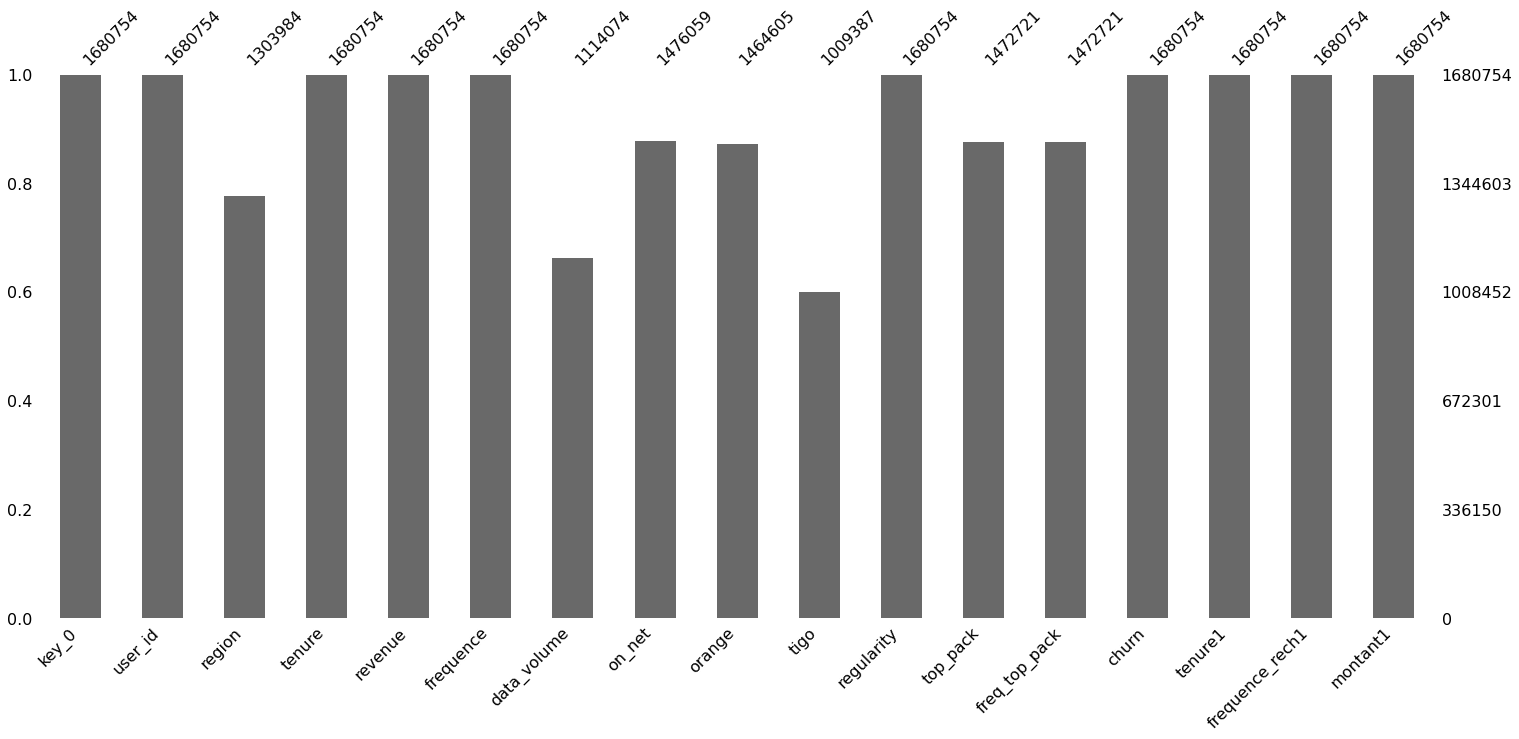

In [59]:
mno.bar(data)

In [60]:
data.dtypes

key_0                int64
user_id             object
region              object
tenure              object
revenue            float64
frequence          float64
data_volume        float64
on_net             float64
orange             float64
tigo               float64
regularity           int64
top_pack            object
freq_top_pack      float64
churn                int64
tenure1            float64
frequence_rech1    float64
montant1           float64
dtype: object

In [61]:
data.nunique()

key_0              1680754
user_id            1680754
region                  14
tenure                   8
revenue              39742
frequence               91
data_volume          43850
on_net               10320
orange                3283
tigo                  1376
regularity              62
top_pack               142
freq_top_pack          257
churn                    2
tenure1                  8
frequence_rech1       2079
montant1              9176
dtype: int64

In [62]:
data[data.user_id=='0000398021ccd3a488fa1a63dee3b2f0d471f9fd']

,key_0,user_id,region,tenure,revenue,frequence,data_volume,on_net,orange,tigo,regularity,top_pack,freq_top_pack,churn,tenure1,frequence_rech1,montant1
6,6,0000398021ccd3a488fa1a63dee3b2f0d471f9fd,DAKAR,K > 24 month,1502.0,12.0,NaN,2.0,53.0,2.0,31,NaN,NaN,0,7.0,3.0,1500.0


In [63]:
data['top_pack']=data['top_pack'].factorize()[0]

In [64]:
data['top_pack'].replace({-1: np.nan }, inplace=True)

In [65]:
data.top_pack.value_counts()

5.0      373840
0.0      179482
11.0     135436
7.0       99702
3.0       79471
          ...  
112.0         1
116.0         1
108.0         1
83.0          1
131.0         1
Name: top_pack, Length: 142, dtype: int64

In [66]:
# from sklearn.impute import KNNImputer

In [67]:
cols = ['regularity', 'frequence', 'top_pack', 'freq_top_pack']
X2 = data[cols]

In [68]:
impute_it2 = IterativeImputer(max_iter=10, random_state=42)
impute_it2 = impute_it2.fit_transform(X2)
m = pd.DataFrame(impute_it2, columns=cols)
m.rename({'top_pack': 'top_pack1'}, axis=1, inplace=True)
m.rename({'freq_top_pack': 'freq_top_pack1'}, axis=1, inplace=True)

In [69]:
m

,regularity,frequence,top_pack1,freq_top_pack1
0,54.0,17.0,0.0,8.0
1,17.0,2.0,1.0,1.0
2,62.0,18.0,2.0,11.0
3,11.0,1.0,3.0,2.0
4,62.0,18.0,4.0,18.0
...,...,...,...,...
1680749,52.0,7.0,5.0,4.0
1680750,50.0,38.0,7.0,33.0
1680751,53.0,8.0,3.0,5.0
1680752,15.0,10.0,15.0,6.0


In [70]:
data.drop('key_0', axis=1, inplace=True)

In [71]:
extracted_col = m[["top_pack1", 'freq_top_pack1']]
data = data.merge(extracted_col, on=data.user_id)

In [72]:
data.drop(columns=['top_pack', 'freq_top_pack'], axis=1, inplace=True)

In [73]:
data.isnull().sum()

key_0                   0
user_id                 0
region             376770
tenure                  0
revenue                 0
frequence               0
data_volume        566680
on_net             204695
orange             216149
tigo               671367
regularity              0
churn                   0
tenure1                 0
frequence_rech1         0
montant1                0
top_pack1               0
freq_top_pack1          0
dtype: int64

In [74]:
566680/data.shape[0]

0.3371582039965397

In [75]:
data.drop(columns=['user_id', 'tenure'], inplace=True)
data['region']=data['region'].factorize()[0]

In [76]:
data.dtypes

key_0               object
region               int64
revenue            float64
frequence          float64
data_volume        float64
on_net             float64
orange             float64
tigo               float64
regularity           int64
churn                int64
tenure1            float64
frequence_rech1    float64
montant1           float64
top_pack1          float64
freq_top_pack1     float64
dtype: object

## START HERE

In [77]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
df.head()
list1=['data_volume', 'on_net', 'orange', 'tigo', 'key_0', 'region']
testdf = data[data['data_volume'].isnull()==True]
traindf = data[data['data_volume'].isnull()==False]
y = traindf['data_volume']
traindf.drop(columns=list1,axis=1,inplace=True)
lr.fit(traindf,y)
testdf.drop(columns=list1,axis=1,inplace=True)
pred = lr.predict(testdf)
testdf['data_volume']= pred

C:\Users\Acer\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Acer\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-77-43de684559ce>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf['data_volume']= pred


In [78]:
pred

array([-776.36688474, -633.92093956, 4547.94017828, ..., 4587.92550875,
       -919.72469022, 2366.14659061])

In [79]:
pred_list = pred.tolist()

In [80]:
data.isnull().sum()

key_0                   0
region                  0
revenue                 0
frequence               0
data_volume        566680
on_net             204695
orange             216149
tigo               671367
regularity              0
churn                   0
tenure1                 0
frequence_rech1         0
montant1                0
top_pack1               0
freq_top_pack1          0
dtype: int64

In [81]:
data

,key_0,region,revenue,frequence,data_volume,on_net,orange,tigo,regularity,churn,tenure1,frequence_rech1,montant1,top_pack1,freq_top_pack1
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,0,4251.0,17.0,4.0,388.0,46.0,1.0,54,0,7.0,15.0,4250.0,0.0,8.0
1,00001654a9d9f96303d9969d0a4a851714a4bb57,-1,1020.0,2.0,NaN,90.0,46.0,7.0,17,0,7.0,2.0,3600.0,1.0,1.0
2,00001dd6fa45f7ba044bd5d84937be464ce78ac2,1,13502.0,18.0,43804.0,41.0,102.0,2.0,62,0,7.0,15.0,13500.0,2.0,11.0
3,000028d9e13a595abe061f9b58f3d76ab907850f,1,985.0,1.0,NaN,39.0,24.0,NaN,11,0,7.0,1.0,1000.0,3.0,2.0
4,0000296564272665ccd2925d377e124f3306b01e,2,9000.0,18.0,NaN,252.0,70.0,91.0,62,0,7.0,17.0,8500.0,4.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1680749,fffe5c84e3db939182ee2a3a3123920025eca8a3,6,3299.0,7.0,NaN,80.0,80.0,NaN,52,0,7.0,7.0,3300.0,5.0,4.0
1680750,fffe7c538a7d66446ee6f66c0b11b5446ec1be68,9,4915.0,38.0,3942.0,1.0,2.0,NaN,50,0,7.0,28.0,4700.0,7.0,33.0
1680751,fffe7e03c7eede2ad0a728ee516c4d342dd16107,1,3999.0,8.0,1587.0,26.0,250.0,1.0,53,0,7.0,8.0,4000.0,3.0,5.0
1680752,ffff0dcc1ab9812bf205b6d76e9d084053cd96f5,-1,3949.0,10.0,1724.0,25.0,71.0,NaN,15,0,7.0,7.0,3950.0,15.0,6.0


In [82]:
# data['data_volume'].fillna("").apply(pred_list) mmmmmmmmmmmmmmmmmmmmmmm

In [83]:
len(pred)

566680

In [84]:
w = pd.DataFrame(pred, columns=['miss'])

In [85]:
# data['data_volume']=data['data_volume'].fillna(w['miss'])

In [86]:
data['data_volume'].fillna(pd.Series(pred), inplace=True)

In [87]:
data.isnull().sum()

key_0                   0
region                  0
revenue                 0
frequence               0
data_volume        375700
on_net             204695
orange             216149
tigo               671367
regularity              0
churn                   0
tenure1                 0
frequence_rech1         0
montant1                0
top_pack1               0
freq_top_pack1          0
dtype: int64

In [88]:
data.describe()

,region,revenue,frequence,data_volume,on_net,orange,tigo,regularity,churn,tenure1,frequence_rech1,montant1,top_pack1,freq_top_pack1
count,1.680754e+06,1.680754e+06,1.680754e+06,1.305054e+06,1.476059e+06,1.464605e+06,1.009387e+06,1.680754e+06,1.680754e+06,1.680754e+06,1.680754e+06,1.680754e+06,1.680754e+06,1.680754e+06
mean,2.514920e+00,5.509137e+03,1.397511e+01,3.618209e+03,3.013222e+02,9.596046e+01,2.317800e+01,3.813595e+01,4.592760e-02,6.871054e+00,1.130004e+01,5.415477e+03,8.838127e+00,8.391557e+00
std,3.167830e+00,7.188312e+03,1.468782e+01,1.232783e+04,9.070091e+02,2.040631e+02,6.381884e+01,1.960879e+01,2.093282e-01,6.421261e-01,1.322480e+01,7.079671e+03,8.338430e+00,1.183868e+01
min,-1.000000e+00,1.000000e+00,1.000000e+00,-2.837522e+04,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-1.966086e-01,-1.210490e+03,0.000000e+00,-1.818397e+00
25%,1.000000e+00,1.000000e+03,3.000000e+00,0.000000e+00,6.000000e+00,8.000000e+00,2.000000e+00,2.100000e+01,0.000000e+00,7.000000e+00,2.000000e+00,1.000000e+03,5.000000e+00,1.108837e+00
50%,1.000000e+00,3.000000e+03,9.000000e+00,6.430000e+02,3.400000e+01,2.900000e+01,6.000000e+00,4.100000e+01,0.000000e+00,7.000000e+00,6.000000e+00,3.000000e+03,7.000000e+00,4.000000e+00
75%,5.000000e+00,7.362000e+03,2.000000e+01,3.676811e+03,1.830000e+02,1.000000e+02,2.000000e+01,5.700000e+01,0.000000e+00,7.000000e+00,1.500000e+01,7.150000e+03,1.100000e+01,1.100000e+01
max,1.300000e+01,5.321770e+05,9.100000e+01,1.556829e+06,5.080900e+04,7.660000e+03,4.174000e+03,6.200000e+01,1.000000e+00,7.000000e+00,1.460000e+02,4.700000e+05,1.410000e+02,7.130000e+02


In [89]:
lr = LinearRegression()
df.head()
list1=['data_volume', 'on_net', 'orange', 'tigo', 'key_0', 'region']
testdf = data[data['on_net'].isnull()==True]
traindf = data[data['on_net'].isnull()==False]
y = traindf['on_net']
traindf.drop(columns=list1,axis=1,inplace=True)
lr.fit(traindf,y)
testdf.drop(columns=list1,axis=1,inplace=True)
pred = lr.predict(testdf)
testdf['on_net']= pred

C:\Users\Acer\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Acer\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-89-315430f1c607>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf['on_net']= pred


In [90]:
data[data['on_net'].isnull()==True].index

Int64Index([      9,      11,      20,      69,      70,      73,      77,
                 79,      92,      96,
            ...
            1680687, 1680690, 1680692, 1680702, 1680713, 1680727, 1680730,
            1680734, 1680743, 1680747],
           dtype='int64', length=204695)

In [91]:
len(pred)

204695

In [92]:
h=pd.DataFrame(pred, index=data[data['on_net'].isnull()==True].index)

In [93]:
h

,0
9,-56.025037
11,625.831374
20,-36.185090
69,56.822448
70,-66.239856
...,...
1680727,-6.712840
1680730,-104.024809
1680734,224.182585
1680743,-74.674270


In [94]:
dict1 = h.to_dict();

In [95]:
dict1

{0: {9: -56.02503678949119,
  11: 625.8313744698339,
  20: -36.1850903861669,
  69: 56.822448049700085,
  70: -66.23985597319088,
  73: 92.88366223828157,
  77: 420.0488685914452,
  79: -109.01487232119857,
  92: 367.47342461043246,
  96: -69.50635171745431,
  111: 245.22778108799338,
  114: 248.19928922674728,
  143: -76.64708784544142,
  172: 171.74433220804497,
  190: -219.67188414428665,
  213: 12.12343404233222,
  231: -58.6268353797031,
  233: -10.478158690416805,
  236: -118.65988268438295,
  238: 176.26613606773273,
  261: -35.587766675299356,
  279: -98.895373673909,
  282: -8.21893609626008,
  288: -96.36404606903218,
  292: -47.96066934388894,
  305: 70.51393553526981,
  309: -53.55050030716686,
  316: -53.35427299136788,
  341: 29.60380569362917,
  346: 50.59447469107289,
  350: 36.848700771116526,
  373: 84.1914488788617,
  380: 53.16260782281154,
  382: 45.015195026739434,
  388: -65.65818467121414,
  409: -126.19457368348014,
  421: -28.77574653491665,
  434: -221.296640

In [96]:
dict1.keys

<function dict.keys>

In [97]:
# data['on_net'].fillna(data.on_net.map(dict1), inplace=True)

In [98]:
# data.on_net.mode()

In [99]:
# data['on_net'].fillna(data.on_net.mode(), inplace=True)

In [100]:
# mode_size=data['region'].mode()
# mode_size

In [101]:
# data=data.fillna(value={'size':mode_size[0]})

In [102]:
data.isnull().sum()

key_0                   0
region                  0
revenue                 0
frequence               0
data_volume        375700
on_net             204695
orange             216149
tigo               671367
regularity              0
churn                   0
tenure1                 0
frequence_rech1         0
montant1                0
top_pack1               0
freq_top_pack1          0
dtype: int64

In [103]:
train_mice = data.copy(deep=True)
mice_imputer = IterativeImputer()
train_mice['tigo'] = mice_imputer.fit_transform(train_mice[['tigo']])

In [104]:
train_mice

,key_0,region,revenue,frequence,data_volume,on_net,orange,tigo,regularity,churn,tenure1,frequence_rech1,montant1,top_pack1,freq_top_pack1
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,0,4251.0,17.0,4.000000,388.0,46.0,1.000000,54,0,7.0,15.0,4250.0,0.0,8.0
1,00001654a9d9f96303d9969d0a4a851714a4bb57,-1,1020.0,2.0,-633.920940,90.0,46.0,7.000000,17,0,7.0,2.0,3600.0,1.0,1.0
2,00001dd6fa45f7ba044bd5d84937be464ce78ac2,1,13502.0,18.0,43804.000000,41.0,102.0,2.000000,62,0,7.0,15.0,13500.0,2.0,11.0
3,000028d9e13a595abe061f9b58f3d76ab907850f,1,985.0,1.0,1587.825410,39.0,24.0,23.177995,11,0,7.0,1.0,1000.0,3.0,2.0
4,0000296564272665ccd2925d377e124f3306b01e,2,9000.0,18.0,2150.923573,252.0,70.0,91.000000,62,0,7.0,17.0,8500.0,4.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1680749,fffe5c84e3db939182ee2a3a3123920025eca8a3,6,3299.0,7.0,NaN,80.0,80.0,23.177995,52,0,7.0,7.0,3300.0,5.0,4.0
1680750,fffe7c538a7d66446ee6f66c0b11b5446ec1be68,9,4915.0,38.0,3942.000000,1.0,2.0,23.177995,50,0,7.0,28.0,4700.0,7.0,33.0
1680751,fffe7e03c7eede2ad0a728ee516c4d342dd16107,1,3999.0,8.0,1587.000000,26.0,250.0,1.000000,53,0,7.0,8.0,4000.0,3.0,5.0
1680752,ffff0dcc1ab9812bf205b6d76e9d084053cd96f5,-1,3949.0,10.0,1724.000000,25.0,71.0,23.177995,15,0,7.0,7.0,3950.0,15.0,6.0


In [105]:
train_mice.drop('key_0', axis=1, inplace=True)

In [106]:
data.drop('key_0', axis=1, inplace=True)

In [107]:
train_mice.rename({'tigo': 'tigo1'}, axis=1, inplace=True)
extracted_col = train_mice["tigo1"]
data = data.merge(extracted_col, on=data.index)

In [108]:
data

,key_0,region,revenue,frequence,data_volume,on_net,orange,tigo,regularity,churn,tenure1,frequence_rech1,montant1,top_pack1,freq_top_pack1,tigo1
0,0,0,4251.0,17.0,4.000000,388.0,46.0,1.0,54,0,7.0,15.0,4250.0,0.0,8.0,1.000000
1,1,-1,1020.0,2.0,-633.920940,90.0,46.0,7.0,17,0,7.0,2.0,3600.0,1.0,1.0,7.000000
2,2,1,13502.0,18.0,43804.000000,41.0,102.0,2.0,62,0,7.0,15.0,13500.0,2.0,11.0,2.000000
3,3,1,985.0,1.0,1587.825410,39.0,24.0,NaN,11,0,7.0,1.0,1000.0,3.0,2.0,23.177995
4,4,2,9000.0,18.0,2150.923573,252.0,70.0,91.0,62,0,7.0,17.0,8500.0,4.0,18.0,91.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1680749,1680749,6,3299.0,7.0,NaN,80.0,80.0,NaN,52,0,7.0,7.0,3300.0,5.0,4.0,23.177995
1680750,1680750,9,4915.0,38.0,3942.000000,1.0,2.0,NaN,50,0,7.0,28.0,4700.0,7.0,33.0,23.177995
1680751,1680751,1,3999.0,8.0,1587.000000,26.0,250.0,1.0,53,0,7.0,8.0,4000.0,3.0,5.0,1.000000
1680752,1680752,-1,3949.0,10.0,1724.000000,25.0,71.0,NaN,15,0,7.0,7.0,3950.0,15.0,6.0,23.177995


In [123]:
data.drop('tigo', axis=1, inplace=True)

In [124]:
data.isnull().sum()

key_0                   0
region                  0
revenue                 0
frequence               0
data_volume        375700
on_net             204695
orange             216149
regularity              0
churn                   0
tenure1                 0
frequence_rech1         0
montant1                0
top_pack1               0
freq_top_pack1          0
tigo1                   0
dtype: int64

## END HERE

In [110]:
# cols = ['revenue', 'regularity', 'orange']
# X = data[cols]

In [111]:
# from sklearn.impute import KNNImputer
  
# # create an object for KNNImputer
# imputer = KNNImputer(n_neighbors=2)
# after_imputation = imputer.fit_transform(X)

In [112]:
# from sklearn.impute import KNNImputer
# knn = KNNImputer(n_neighbors=2, add_indicator=True)
# knn.fit(X)
# knn.transform(X)

## Dealing with imbalance
[Dealinng with an imbalance](https://www.kaggle.com/code/prasathm2001/undersampling-in-wine-quality)

In [113]:
# missing_columns = ['revenue', 'arpu_segment', 'frequence']

In [114]:
# def random_imputation(df, feature):

#     number_missing = df[feature].isnull().sum()
#     observed_values = df.loc[df[feature].notnull(), feature]
#     df.loc[df[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace = True)
    
#     return df

In [115]:
# for feature in missing_columns:
#     df[feature + '_imp'] = df[feature]
#     df = random_imputation(df, feature)

In [116]:
# from sklearn import linear_model

# random_data = pd.DataFrame(columns = ["Ran" + name for name in missing_columns])

# for feature in missing_columns:
        
#     random_data["Ran" + feature] = df[feature + '_imp']
#     parameters = list(set(df.columns) - set(missing_columns) - {feature + '_imp'})
    
#     model = linear_model.LinearRegression()
#     model.fit(X = df[parameters], y = df[feature + '_imp'])
    
#     #Standard Error of the regression estimates is equal to std() of the errors of each estimates
#     predict = model.predict(df[parameters])
#     std_error = (predict[df[feature].notnull()] - df.loc[df[feature].notnull(), feature + '_imp']).std()
    
#     #observe that I preserve the index of the missing data from the original dataframe
#     random_predict = np.random.normal(size = df[feature].shape[0], 
#                                       loc = predict, 
#                                       scale = std_error)
#     random_data.loc[(df[feature].isnull()) & (random_predict > 0), "Ran" + feature] = random_predict[(df[feature].isnull()) & 
#                                                                             (random_predict > 0)]

In [117]:
# cols = ['tenure1', 'regularity', 'churn', 'data_volume']
# X = data[cols]

In [118]:
# # initialize the RandomForest regressor
# from sklearn.ensemble import RandomForestRegressor
# rf = RandomForestRegressor(n_estimators=10, random_state=123)
# # specify estimator to be rf 
# rf_imputer = IterativeImputer(estimator=rf, random_state=123)
# rf_imputer = rf_imputer.fit_transform(X)

In [119]:
# # new in 0.22
# from sklearn.impute import KNNImputer

In [120]:
# impute_knn = KNNImputer(n_neighbors=2)
# impute_knn.fit_transform(X)

In [121]:
# from numpy import mean
# from numpy import std
# from pandas import read_csv
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.pipeline import Pipeline

# # split into input and output elements
# data1 = data.values
# ix = [i for i in range(data1.shape[1]) if i != 15]
# X, y = data1[:, ix], data[:, 15]
# # define modeling pipeline
# model = RandomForestClassifier()
# imputer = IterativeImputer()
# pipeline = Pipeline(steps=[('i', imputer), ('m', model)])
# # define model evaluation
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# # evaluate model
# scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

In [122]:
# y =data[:, 15]